In [1]:
!pip install nltk


In [5]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 8.0 MB/s eta 0:00:00


In [3]:
!nvidia-smi

Thu Nov 30 16:15:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Loading Libraries**

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec, FastText, KeyedVectors
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, GRU, Bidirectional, Dense, Flatten,Dropout
from sklearn.metrics.pairwise import cosine_similarity
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import re
import time
import string
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from nltk.corpus import wordnet
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from nltk.corpus import stopwords
import contractions  # Library for expanding contractions



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Mounting Drive**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
HOME = '/content/drive/MyDrive/DeepLearning/HW/HW4'

In [10]:
import os
os.chdir(HOME)
os.getcwd()

'/content/drive/MyDrive/DeepLearning/HW/HW4'

**Question 1.**

**Cleaning IMDB Data**

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/DeepLearning/HW/HW3/IMDB Dataset.csv')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [ ]:
#### Removing HTML tags,punctuations,special characters etc using regular expressions.
TAG_RE = re.compile(r'<[^>]+>') # match anything in the tag <...>

def remove_tags(text):
    #print(text)
    return TAG_RE.sub('', text) # replace that tag with a null string

def process_text(sen):
    #print(sen)
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence) # look for any character except a toz or A to Z and replace with space

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence) # Look for one or more space with any a-z or a-Z letter followed by multiple space and replace with a space
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence) # finally check for continuous space and replace them with a single space

    return sentence

In [ ]:
# clean text data
start = time.time()
for row in df.itertuples():
    article = process_text(str(df.loc[row.Index,'review']))
    df.loc[row.Index,'clean_review'] = article
stop = time.time()
print(f'Cleaning took: {round((stop-start)/60, 3)} minutes')

Cleaning took: 0.282 minutes


In [ ]:
df.head(2)

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The filming tech...


In [ ]:
df['review'][742]

'Mario Lewis of the Competitive Enterprise Institute has written a definitive 120-page point-by-point, line-by-line refutation of this mendacious film, which should be titled A CONVENIENT LIE. The website address where his debunking report, which is titled "A SKEPTIC\'S GUIDE TO AN INCONVENIENT TRUTH" can be found at is :www.cei.org. A shorter 10-page version can be found at: www.cei.org/pdf/5539.pdf Once you read those demolitions, you\'ll realize that alleged "global warming" is no more real or dangerous than the Y2K scare of 1999, which Gore also endorsed, as he did the pseudo-scientific film THE DAY AFTER TOMORROW, which was based on a book written by alleged UFO abductee Whitley Strieber. As James "The Amazing" Randi does to psychics, and Philip Klass does to UFOs, and Gerald Posner does to JFK conspir-idiocy theories, so does Mario Lewis does to Al Gore\'s movie and the whole "global warming" scam.'

In [ ]:
df['clean_review'][742]

'Mario Lewis of the Competitive Enterprise Institute has written definitive page point by point line by line refutation of this mendacious film which should be titled CONVENIENT LIE The website address where his debunking report which is titled SKEPTIC GUIDE TO AN INCONVENIENT TRUTH can be found at is www cei org shorter page version can be found at www cei org pdf pdf Once you read those demolitions you ll realize that alleged global warming is no more real or dangerous than the scare of which Gore also endorsed as he did the pseudo scientific film THE DAY AFTER TOMORROW which was based on book written by alleged UFO abductee Whitley Strieber As James The Amazing Randi does to psychics and Philip Klass does to UFOs and Gerald Posner does to JFK conspir idiocy theories so does Mario Lewis does to Al Gore movie and the whole global warming scam '

In [ ]:
def remove_urls_emails(text):
    # Remove URLs that start with 'http' or 'www' or emails
    text = re.sub(r'\bwww\b', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    return text

# Apply the function to the 'sentiment' column
df['clean_review'] = df['clean_review'].apply(remove_urls_emails)

In [ ]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
# These excluding words are important for capturing the negative sentiments.
# Therefore, should not be taken out of the stopword list.
def clean_review(text):
    excluding = ['against', 'not', 'don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't",
             'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
             'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't",
             'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren',
             "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove stop words
    stop = stopwords.words('english')
    #print("stop english",stop)
    # New stop word list
    stop_words = [word for word in stop if word not in excluding]
    #print("stop words",stop_words)

    text = [x for x in text if x not in stop_words]
    #print("text words",text)

    text = [word.strip(string.punctuation) for word in text]

    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
start = time.time()
df["clean_review"] = df["clean_review"].apply(lambda x: clean_review(x))
stop = time.time()
print(f'Cleaning took: {round((stop-start)/60, 3)} minutes')


Cleaning took: 5.904 minutes


In [ ]:
df.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mention watch oz episode hook rig...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production film technique una...
2,I thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


In [ ]:
df[df["clean_review"]==""]["review"].value_counts() # No empty rows of clean_review

Series([], Name: review, dtype: int64)

In [ ]:
df.isnull().sum()

review          0
sentiment       0
clean_review    0
dtype: int64

In [ ]:
df.tail()

,review,sentiment,clean_review
49995,I thought this movie did a down right good job...,positive,think movie right good job wasn creative origi...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad act idiotic direct a...
49997,I am a Catholic taught in parochial elementary...,negative,catholic teach parochial elementary school nun...
49998,I'm going to have to disagree with the previou...,negative,go disagree previous comment side maltin one s...
49999,No one expects the Star Trek movies to be high...,negative,one expect star trek movie high art fan expect...


In [ ]:
df['target'] = np.where(df['sentiment']=='positive',1,0)
df.head(-5)

,review,sentiment,clean_review,target
0,One of the other reviewers has mentioned that ...,positive,one reviewer mention watch oz episode hook rig...,1
1,A wonderful little production. <br /><br />The...,positive,wonderful little production film technique una...,1
2,I thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...,1
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...,1
...,...,...,...,...
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative,lame lame lame minute cringe fest minute long ...,0
49991,"Les Visiteurs, the first movie about the medie...",negative,le visiteurs first movie medieval time travele...,0
49992,John Garfield plays a Marine who is blinded by...,positive,john garfield play marine blind grenade fight ...,1
49993,Robert Colomb has two full-time jobs. He's kno...,negative,robert colomb two full time job know throughou...,0


**Saving Cleaned File**

In [ ]:
df.to_csv('/content/drive/MyDrive/DeepLearning/HW/HW4/IMDB_cleaned.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DeepLearning/HW/HW4/IMDB_cleaned.csv')

# **Build Vocabulary,Train and use Doc2Vec Model with LSTM, GRU, Bi-RNN, Bi-LSTM, and Bi-GRU**

In [ ]:
# Tokenizing the text data for Doc2Vec Model
tagged_data = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(df['clean_review'])]

# Train Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=10)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

doc2vec_model.save("/content/drive/MyDrive/DeepLearning/HW/HW4/doc2vec_model")


In [ ]:
# To check the vector of a document in the training data
vector = doc2vec_model.dv['0']  # '0' is the tag of the document i.e. first row
print(vector)

[ 0.13464175 -0.25133464  0.10044955 -0.01193706 -0.7376709  -0.4771478
  0.22209346  0.521544   -0.25811952 -0.05397695 -0.2764069  -0.5914641
 -0.04162106  0.12638962  0.0575166  -0.4638382   0.13832185 -0.3479379
 -0.05685578  0.11632762  0.03488091 -0.25225216  0.24196833  0.18280059
 -0.14919634 -0.27191666 -0.2348101   0.42264676 -0.09047851 -0.16482033
  0.3396192  -0.06394333  0.4556848   0.223492    0.15642081 -0.45630544
  0.11386944 -0.09053209  0.31524456  0.38856864  0.10267985  0.00438661
  0.5143395   0.1307315   0.31057185 -0.9038223  -0.21882269  0.07157907
 -0.18373077  0.19084336  0.1984848   0.18817134  0.15500209  0.3257857
 -0.3319201   0.29711214  0.11135387  0.05300928 -0.09766208  0.0232433
  0.09195484 -0.18509454  0.2931629   0.1178014   0.13873847 -0.1567614
  0.23357879  0.1361525   0.5716606  -0.014956    0.29834306 -0.1365012
  0.10821853 -0.26629287  0.19608444 -0.14297348  0.19144753 -0.62094706
 -0.6112086   0.12768774 -0.04377558  0.18919249 -0.013832

In [ ]:
results =[]

In [ ]:
doc2vec_model = Doc2Vec.load("/content/drive/MyDrive/DeepLearning/HW/HW4/doc2vec_model")

# Get document embeddings
doc_embeddings = np.array([doc2vec_model.infer_vector(doc.split()) for doc in df['clean_review']])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(doc_embeddings, df['target'], test_size=0.2, random_state=42)

# Reshape the input data for all bidirectional models
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

models = [
    (SimpleRNN(128), "RNN"),
    (LSTM(128), "LSTM"),
    (GRU(128), "GRU"),
    (Bidirectional(SimpleRNN(128, return_sequences=True), input_shape=(1, doc_embeddings.shape[1])), "Bi-RNN"),
    (Bidirectional(LSTM(128, return_sequences=True), input_shape=(1, doc_embeddings.shape[1])), "Bi-LSTM"),
    (Bidirectional(GRU(128, return_sequences=True), input_shape=(1, doc_embeddings.shape[1])), "Bi-GRU")
]

# Train and evaluate each model
for model, model_name in models:
    print(f"Training {model_name}...")

    # Build model
    model_sequence = Sequential()
    model_sequence.add(model)
    model_sequence.add(Dense(1, activation='sigmoid'))

    # Compile model
    model_sequence.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model
    model_sequence.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=2)

    y_pred = model_sequence.predict(X_test_reshaped)

    # Convert probabilities to class labels
    y_pred_labels = (y_pred > 0.5).astype(int)

    # Ensure y_test is a 1D array of binary values
    y_test = np.array(y_test)

    # Ensure y_pred_labels is a 1D array of binary values
    y_pred_labels = y_pred_labels.flatten()

    # Print classification report and confusion matrix
    print(f"Classification Report for {model_name} with Doc2Vec :")
    print(classification_report(y_test, y_pred_labels))

    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_labels)
    print(f"Confusion Matrix for {model_name} with Doc2Vec :")
    print(conf_matrix)

    # Calculate accuracy using confusion matrix values
    accuracy_from_conf_matrix = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
    #print(f"Accuracy calculated from confusion matrix: {accuracy_from_conf_matrix * 100:.2f}%")
    print(f'{model_name} with Doc2Vec embedding has an Accuracy of: {accuracy_from_conf_matrix * 100:.2f}%')

    results.append({'Embedding' : 'Doc2Vec', 'Model': model_name, 'Accuracy': accuracy_from_conf_matrix * 100})



Training RNN...
Epoch 1/20
1000/1000 - 4s - loss: 0.3735 - accuracy: 0.8365 - val_loss: 0.3517 - val_accuracy: 0.8564 - 4s/epoch - 4ms/step
Epoch 2/20
1000/1000 - 3s - loss: 0.3601 - accuracy: 0.8441 - val_loss: 0.3495 - val_accuracy: 0.8549 - 3s/epoch - 3ms/step
Epoch 3/20
1000/1000 - 3s - loss: 0.3578 - accuracy: 0.8447 - val_loss: 0.3492 - val_accuracy: 0.8569 - 3s/epoch - 3ms/step
Epoch 4/20
1000/1000 - 3s - loss: 0.3556 - accuracy: 0.8453 - val_loss: 0.3476 - val_accuracy: 0.8555 - 3s/epoch - 3ms/step
Epoch 5/20
1000/1000 - 3s - loss: 0.3528 - accuracy: 0.8462 - val_loss: 0.3454 - val_accuracy: 0.8574 - 3s/epoch - 3ms/step
Epoch 6/20
1000/1000 - 3s - loss: 0.3499 - accuracy: 0.8471 - val_loss: 0.3419 - val_accuracy: 0.8602 - 3s/epoch - 3ms/step
Epoch 7/20
1000/1000 - 3s - loss: 0.3469 - accuracy: 0.8509 - val_loss: 0.3425 - val_accuracy: 0.8574 - 3s/epoch - 3ms/step
Epoch 8/20
1000/1000 - 3s - loss: 0.3436 - accuracy: 0.8518 - val_loss: 0.3398 - val_accuracy: 0.8577 - 3s/epoch - 3

# **Word2Vec, Glove, Fasttext**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_review'], df['target'], test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000,), (10000,), (40000,), (10000,))

In [ ]:
X_train

39087    keep ask many fight scream match swear general...
30893    not watch entire movie could not watch entire ...
45278    touch love story reminiscent mood love draw he...
16398    latter day fulci schlocker totally abysmal con...
13653    first firmly believe norwegian movie continual...
                               ...                        
11284    shadow magic recapture joy amazement first mov...
44732    find movie quite enjoyable fairly entertain go...
38158    avoid one terrible movie excite pointless murd...
860      production quite surprise absolutely love obsc...
15795    decent movie although little bit short time pa...
Name: clean_review, Length: 40000, dtype: object

In [ ]:
X_train[0], y_train[0]

('one reviewer mention watch oz episode hook right exactly happen first thing strike oz brutality unflinching scene violence set right word go trust not show faint hearted timid show pull punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy not high agenda em city home many aryan muslim gangstas latinos christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show wouldn dare forget pretty picture paint mainstream audience forget charm forget romance oz doesn mess around first episode ever saw struck nasty surreal couldn say ready watch developed taste oz get accustomed high level graphic violence not violence injustice crook guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experienc

In [ ]:
# Calculate the maximum number of words dynamically
max_words = len(set(" ".join(X_train).split()))
print("Maximum number of words:", max_words)

Maximum number of words: 82241


In [ ]:
# Tokenization
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequence = tokenizer.texts_to_sequences(X_train)
X_test_sequence = tokenizer.texts_to_sequences(X_test)

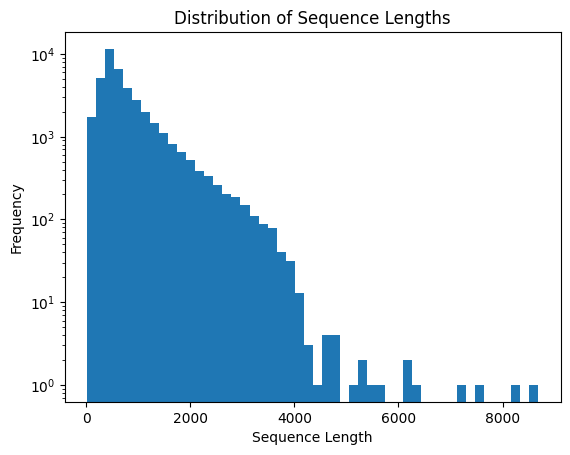

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_train is a list of sequences
sequence_lengths = [len(seq) for seq in X_train]

# Plot a histogram of sequence lengths
plt.hist(sequence_lengths, bins=50,log=True)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.show()

**The distribution of sequence I checked to see how much max length should I keep to keep the maximum information intact. I tried with 8000, 4000, and 2000 but it was taking way too long. So, going with 400 because it has highest frequency and also
for efficiency.**


In [ ]:
# Pad sequences
max_len = 400
X_train_padded = pad_sequences(X_train_sequence, maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequence, maxlen=max_len)

In [ ]:
# Load models

word2vec_model = api.load("word2vec-google-news-300")
fasttext_model = FastText.load_fasttext_format("/content/drive/MyDrive/DeepLearning/HW/HW4/wiki.en/wiki.en.bin")
glove_model = KeyedVectors.load_word2vec_format("/content/drive/MyDrive/DeepLearning/HW/HW4/glove.6B.300d.txt", binary=False, no_header=True)


<ipython-input-54-34c14da794a0>:4: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  fasttext_model = FastText.load_fasttext_format("/content/drive/MyDrive/DeepLearning/HW/HW4/wiki.en/wiki.en.bin")


In [ ]:
# Word Embeddings
embeddings = {
    'FastText': fasttext_model,
    'Word2Vec': word2vec_model,
    'GloVe': glove_model,
}

In [ ]:
# Sequential Models
models = {
    'RNN': SimpleRNN,
    'LSTM': LSTM,
    'GRU': GRU,
    'Bi-RNN': lambda units, **kwargs: Bidirectional(SimpleRNN(units, **kwargs)),
    'Bi-LSTM': lambda units, **kwargs: Bidirectional(LSTM(units, **kwargs)),
    'Bi-GRU': lambda units, **kwargs: Bidirectional(GRU(units, **kwargs)),
}

In [ ]:
def load_pretrained_embedding_matrix(embedding_model, word_index, max_words, embedding_dim):
    # Initialize the embedding matrix with zeros
    embedding_matrix = np.zeros((max_words, embedding_dim))

    # Iterate over the words in the tokenizer's word index
    for word, i in word_index.items():
        if i < max_words:
            try:
                # Get the embedding vector for the word from the pre-trained model
                if isinstance(embedding_model, dict):
                    embedding_vector = embedding_model.get(word) # For GloVe
                else:
                    #, FastText, Doc2Vec, Word2Vec
                    embedding_vector = embedding_model[word]

                if embedding_vector is not None:
                    embedding_matrix[i] = embedding_vector
            except KeyError:
                # Handle the case where the word is not in the pre-trained model vocabulary
                pass

    return embedding_matrix

In [ ]:
# Define the model checkpoint callback
checkpoint_filepath = '/content/drive/MyDrive/DeepLearning/HW/HW4/best_model_doc2vec.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',  # Choose the metric to monitor for saving the best model
    mode='max',  # Use 'max' if the metric should be maximized, 'min' if minimized
    verbose=1
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
for embedding_name, embedding_model in embeddings.items():
    print('embedding_name, embedding_model = ', embedding_name, embedding_model)
    for model_name, model_type in models.items():
        print('model_name, model_type = ', model_name, model_type)

        # Build the model
        model = Sequential()

        if embedding_name == 'Word2Vec' :
            # Check if embedding_model is a Word2Vec model
            if isinstance(embedding_model, Word2Vec):
                embedding_matrix_word2vec = load_pretrained_embedding_matrix(embedding_model, tokenizer.word_index, max_words, embedding_model.vector_size)
            else:
                embedding_matrix_word2vec = load_pretrained_embedding_matrix(embedding_model, tokenizer.word_index, max_words, len(embedding_model['the']))
            embedding_matrix = embedding_matrix_word2vec

            #embedding_matrix_word2vec = load_pretrained_embedding_matrix(word2vec_model.wv, tokenizer.word_index, max_words, word2vec_model.vector_size)
            #embedding_matrix = embedding_matrix_word2vec
        elif embedding_name == 'FastText' :
            embedding_matrix_fasttext = load_pretrained_embedding_matrix(fasttext_model.wv, tokenizer.word_index, max_words, fasttext_model.vector_size)
            embedding_matrix = embedding_matrix_fasttext
        elif embedding_name == 'GloVe':
            embedding_matrix_glove = load_pretrained_embedding_matrix(glove_model, tokenizer.word_index, max_words, len(glove_model['the']))
            embedding_matrix = embedding_matrix_glove

        print(f'embedding matrix of embedding {embedding_name} : ', embedding_matrix)
        embedding_layer = Embedding(
            input_dim=max_words,
            output_dim=embedding_matrix.shape[1],
            input_length=max_len,
            trainable=False,
            weights=[embedding_matrix],
        )
        model.add(embedding_layer)
        model.add(model_type(128))  # Adjust units as needed

        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.summary()

        # Train the model
        model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0, callbacks=[model_checkpoint_callback,reduce_lr,early_stop])

        # Evaluate the model
        _, accuracy = model.evaluate(X_test_padded, y_test, verbose=0)

        print(f"model_name {model_name} with {embedding_name} has accuracy of {accuracy}")
        results.append({'Embedding': embedding_name, 'Model': model_name, 'Accuracy': accuracy * 100})

        # Evaluate the model
        y_pred = model.predict(X_test_padded)

        # Convert probabilities to class labels
        y_pred_labels = (y_pred > 0.5).astype(int)

        # Print classification report and confusion matrix
        print(f"Classification Report for {model_name} with {embedding_name}:")
        print(classification_report(y_test, y_pred_labels))

        print(f"Confusion Matrix for {model_name} with {embedding_name}:")
        print(confusion_matrix(y_test, y_pred_labels))


embedding_name, embedding_model =  FastText FastText<vocab=2519370, vector_size=300, alpha=0.025>
model_name, model_type =  RNN <class 'keras.src.layers.rnn.simple_rnn.SimpleRNN'>
embedding matrix of embedding FastText :  [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.13328807 -0.05767915 -0.33409759 ...  0.13057882 -0.27169716
   0.08316325]
 [-0.18028842 -0.13397793 -0.36935762 ...  0.19898225 -0.36105326
   0.1683947 ]
 ...
 [-0.14113562  0.12844351 -0.09726463 ...  0.29306051  0.80443078
  -0.08794205]
 [-0.11768486 -0.0247553  -0.15214039 ...  0.58489919  0.29173273
   0.1966266 ]
 [ 0.05685775  0.27686319 -0.03135364 ...  0.68205708  0.30812877
   0.58232498]]
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 300)          24672300  
                                                                 
 simple

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy did not improve from 0.66263

Epoch 3: val_accuracy improved from 0.66263 to 0.77113, saving model to /content/drive/MyDrive/DeepLearning/HW/HW4/best_model_doc2vec.h5

Epoch 4: val_accuracy did not improve from 0.77113

Epoch 5: val_accuracy did not improve from 0.77113

Epoch 6: val_accuracy did not improve from 0.77113

Epoch 7: val_accuracy did not improve from 0.77113

Epoch 8: val_accuracy did not improve from 0.77113

Epoch 9: val_accuracy did not improve from 0.77113

Epoch 10: val_accuracy did not improve from 0.77113
model_name RNN with FastText has accuracy of 0.5267000198364258
313/313 [==============================] - 8s 26ms/step
Classification Report for RNN with FastText:
              precision    recall  f1-score   support

           0       0.77      0.07      0.12      4961
           1       0.52      0.98      0.68      5039

    accuracy                           0.53     10000
   macro avg       0.64      0.52      0.40     10000
weighted

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.84650 to 0.87050, saving model to /content/drive/MyDrive/DeepLearning/HW/HW4/best_model_doc2vec.h5

Epoch 3: val_accuracy improved from 0.87050 to 0.88687, saving model to /content/drive/MyDrive/DeepLearning/HW/HW4/best_model_doc2vec.h5

Epoch 4: val_accuracy improved from 0.88687 to 0.89237, saving model to /content/drive/MyDrive/DeepLearning/HW/HW4/best_model_doc2vec.h5

Epoch 5: val_accuracy did not improve from 0.89237

Epoch 6: val_accuracy did not improve from 0.89237

Epoch 7: val_accuracy did not improve from 0.89237

Epoch 8: val_accuracy did not improve from 0.89237

Epoch 9: val_accuracy did not improve from 0.89237

Epoch 10: val_accuracy did not improve from 0.89237
model_name LSTM with FastText has accuracy of 0.8784000277519226
313/313 [==============================] - 2s 6ms/step
Classification Report for LSTM with FastText:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      496

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_accuracy did not improve from 0.89400

Epoch 5: val_accuracy did not improve from 0.89400

Epoch 6: val_accuracy did not improve from 0.89400

Epoch 7: val_accuracy did not improve from 0.89400

Epoch 8: val_accuracy did not improve from 0.89400

Epoch 9: val_accuracy did not improve from 0.89400

Epoch 10: val_accuracy did not improve from 0.89400
model_name GRU with FastText has accuracy of 0.8790000081062317
313/313 [==============================] - 2s 6ms/step
Classification Report for GRU with FastText:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4961
           1       0.90      0.86      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix for GRU with FastText:
[[4455  506]
 [ 704 4335]]
model_name, model_type =  Bi-RNN <function <lambda> at 0x7c327d3a8af0>
embedd

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 7: val_accuracy did not improve from 0.89650

Epoch 8: val_accuracy did not improve from 0.89650

Epoch 9: val_accuracy did not improve from 0.89650

Epoch 10: val_accuracy did not improve from 0.89650
model_name GRU with Word2Vec has accuracy of 0.8798999786376953
313/313 [==============================] - 2s 6ms/step
Classification Report for GRU with Word2Vec:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4961
           1       0.91      0.85      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix for GRU with Word2Vec:
[[4521  440]
 [ 761 4278]]
model_name, model_type =  Bi-RNN <function <lambda> at 0x7c327d3a8af0>
embedding matrix of embedding Word2Vec :  [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.17480469 -0.10986328 -0.20019531 ...  0.07

In [ ]:
results_df = pd.DataFrame(results)    # Many Doc2Vec values are coming because of multiple trials and results_df was not reset.
results_df

,Embedding,Model,Accuracy
0,Doc2Vec,RNN,84.289998
1,Doc2Vec,LSTM,83.539999
2,Doc2Vec,GRU,83.950001
3,Doc2Vec,RNN,84.490001
4,Doc2Vec,LSTM,83.649999
5,Doc2Vec,GRU,84.079999
6,Doc2Vec,Bi-RNN,84.560001
7,Doc2Vec,RNN,84.590000
8,Doc2Vec,LSTM,83.965653
9,Doc2Vec,GRU,83.935702


In [ ]:
# Group by Embedding and Model, and get the row with the highest accuracy for each group
max_accuracy_rows = results_df.groupby(['Embedding', 'Model'], as_index=False)['Accuracy'].idxmax()

# Extract the index values from the resulting DataFrame
max_accuracy_indices = max_accuracy_rows['Accuracy']

# Create a new DataFrame with the rows corresponding to the highest accuracies
max_accuracy_df = results_df.loc[max_accuracy_indices].copy()  # Create a copy to avoid SettingWithCopyWarning

# Convert 'Accuracy' column to percentage and round to 2 decimal places
max_accuracy_df['Accuracy'] = (max_accuracy_df['Accuracy']).round(2)

# Reset the index of the resulting DataFrame
max_accuracy_df.reset_index(drop=True, inplace=True)

# Sort the DataFrame in descending order based on 'Accuracy'
max_accuracy_df.sort_values(by='Accuracy', ascending=False, inplace=True)


# **Q1a. RESULTS**

In [ ]:
max_accuracy_df

,Embedding,Model,Accuracy
19,Word2Vec,Bi-LSTM,89.20
12,GloVe,Bi-GRU,88.23
16,GloVe,LSTM,88.20
18,Word2Vec,Bi-GRU,88.05
21,Word2Vec,GRU,87.99
7,FastText,Bi-LSTM,87.97
15,GloVe,GRU,87.91
9,FastText,GRU,87.90
10,FastText,LSTM,87.84
6,FastText,Bi-GRU,87.72


# **The Highest Performing Model is Bi-LSTM with Word2Vec embedding with accuracy of 89%**

In [ ]:
results_df.to_csv('/content/drive/MyDrive/DeepLearning/HW/HW4/results.csv')

# **Q1b. Use Keras embedding layer with sequential model and use cosine similarity to find the first five most similar words to "movie"**

## **Keras and LSTM**

In [ ]:
# Load IMDb dataset
df = pd.read_csv('/content/drive/MyDrive/DeepLearning/HW/HW4/IMDB_cleaned.csv')

# Tokenize the entire dataset
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['clean_review'])
sequences = tokenizer.texts_to_sequences(df['clean_review'])

# Pad sequences to a fixed length
max_len = 100
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Build the embedding model
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the entire dataset
model.fit(padded_sequences, df['target'], epochs=5, batch_size=32, verbose=2)

# Get the word embeddings
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]

# Get the word index from the tokenizer
word_index = tokenizer.word_index

# Function to get the vector for a word
def get_vector(word):
    if word in word_index and word_index[word] < max_words:
        return weights[word_index[word]]
    else:
        return None

# Function to find the most similar words to a given word using cosine similarity, excluding the word itself
def most_similar_words_exclude(word, exclude_word, top_n=5):
    vector1 = get_vector(word)
    if vector1 is None:
        return []

    similarities = cosine_similarity([vector1], weights)[0]

    # Find the indices of the top N most similar words (excluding the given word)
    top_indices = np.argsort(similarities)[::-1]
    top_words = [(list(word_index.keys())[i], similarities[i]) for i in top_indices if list(word_index.keys())[i] != exclude_word][:top_n]

    return top_words

# Find the most similar words to "movie" excluding "movie"
similar_words_movie_exclude_movie = most_similar_words_exclude("movie", exclude_word="movie", top_n=5)
print(f"The most similar words to 'movie' (excluding 'movie') are: {similar_words_movie_exclude_movie}")

Epoch 1/5
1563/1563 - 54s - loss: 0.3464 - accuracy: 0.8496 - 54s/epoch - 34ms/step
Epoch 2/5
1563/1563 - 15s - loss: 0.2562 - accuracy: 0.8972 - 15s/epoch - 9ms/step
Epoch 3/5
1563/1563 - 12s - loss: 0.2164 - accuracy: 0.9139 - 12s/epoch - 8ms/step
Epoch 4/5
1563/1563 - 10s - loss: 0.1739 - accuracy: 0.9331 - 10s/epoch - 7ms/step
Epoch 5/5
1563/1563 - 11s - loss: 0.1432 - accuracy: 0.9468 - 11s/epoch - 7ms/step
The most similar words to 'movie' (excluding 'movie') are: [('film', 1.0), ('obsession', 0.73142433), ('lord', 0.6873765), ('festival', 0.66646934), ('quest', 0.663234)]


##**Keras + LSTM** => The most similar words to 'movie' (excluding 'movie') are: [('**film**', 1.0), ('**obsession**', 0.73142433), ('**lord**', 0.6873765), ('**festival**', 0.66646934), ('**quest**', 0.663234)]

## **Keras and GRU**




In [ ]:
# Load IMDb dataset
df_gru = pd.read_csv('/content/drive/MyDrive/DeepLearning/HW/HW4/IMDB_cleaned.csv')

# Tokenize the entire dataset
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_gru['clean_review'])
sequences = tokenizer.texts_to_sequences(df_gru['clean_review'])

# Pad sequences to a fixed length
max_len = 100
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Build the embedding model
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the entire dataset
model.fit(padded_sequences, df_gru['target'], epochs=5, batch_size=32, verbose=2)

# Get the word embeddings
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]

# Get the word index from the tokenizer
word_index = tokenizer.word_index

# Function to get the vector for a word
def get_vector(word):
    if word in word_index and word_index[word] < max_words:
        return weights[word_index[word]]
    else:
        return None

# Function to find the most similar words to a given word using cosine similarity, excluding the word itself
def most_similar_words_exclude(word, exclude_word, top_n=5):
    vector1 = get_vector(word)
    if vector1 is None:
        return []

    similarities = cosine_similarity([vector1], weights)[0]

    # Find the indices of the top N most similar words (excluding the given word)
    top_indices = np.argsort(similarities)[::-1]
    top_words = [(list(word_index.keys())[i], similarities[i]) for i in top_indices if list(word_index.keys())[i] != exclude_word][:top_n]

    return top_words

# Find the most similar words to "movie" excluding "movie"
similar_words_movie_exclude_movie = most_similar_words_exclude("movie", exclude_word="movie", top_n=5)
print(f"The most similar words to 'movie' (excluding 'movie') are: {similar_words_movie_exclude_movie}")

Epoch 1/5
1563/1563 - 52s - loss: 0.3461 - accuracy: 0.8462 - 52s/epoch - 33ms/step
Epoch 2/5
1563/1563 - 13s - loss: 0.2397 - accuracy: 0.9041 - 13s/epoch - 9ms/step
Epoch 3/5
1563/1563 - 11s - loss: 0.1941 - accuracy: 0.9243 - 11s/epoch - 7ms/step
Epoch 4/5
1563/1563 - 11s - loss: 0.1566 - accuracy: 0.9402 - 11s/epoch - 7ms/step
Epoch 5/5
1563/1563 - 10s - loss: 0.1203 - accuracy: 0.9547 - 10s/epoch - 6ms/step
The most similar words to 'movie' (excluding 'movie') are: [('film', 1.0), ('home', 0.6828351), ('crime', 0.67553556), ('jr', 0.6702849), ('convey', 0.65589595)]


## **Keras + GRU** => The most similar words to 'movie' (excluding 'movie') are: [('**film**', 1.0), ('**home**', 0.6828351), ('**crime**', 0.67553556), ('**jr**', 0.6702849), ('**convey**', 0.65589595)]



## **With Glove Embeddings**

In [ ]:
# Load pre-trained GloVe embeddings
glove_embeddings_index = {}
with open('/content/drive/MyDrive/DeepLearning/HW/HW4/glove.6B.300d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        glove_embeddings_index[word] = coefs

# Function to get the vector for a word using GloVe embeddings
def get_glove_vector(word):
    return glove_embeddings_index.get(word)

# Function to find the most similar words to a given word using cosine similarity with GloVe embeddings
def most_similar_words_glove(word, exclude_word, top_n=5):
    vector1 = get_glove_vector(word)
    if vector1 is None:
        return []

    similarities = cosine_similarity([vector1], [glove_embeddings_index[w] for w in glove_embeddings_index if w != exclude_word])[0]

    # Find the indices of the top N most similar words
    top_indices = np.argsort(similarities)[::-1][:top_n]

    # Get the words and their similarity scores
    similar_words = [(list(glove_embeddings_index.keys())[i], similarities[i]) for i in top_indices]

    return similar_words

# Find the most similar words to "movie" excluding "movie" using GloVe embeddings
similar_words_glove_exclude_movie = most_similar_words_glove("movie", exclude_word="movie", top_n=5)
print(f"The most similar words to 'movie' (excluding 'movie') are: {similar_words_glove_exclude_movie}")

The most similar words to 'movie' (excluding 'movie') are: [('film', 0.85887855), ('tourism', 0.84934735), ('approach', 0.79086804), ('jail', 0.67923284), ('calif.', 0.6750692)]


## **Glove Embeddings** => The most similar words to 'movie' (excluding 'movie') are: [('**film**', 0.85887855), ('**tourism**', 0.84934735), ('**approach**', 0.79086804), ('**jail**', 0.67923284), ('**calif.**', 0.6750692)]




## **With Word2Vec Model**

In [ ]:
# Load the Word2Vec model
word2vec_model = api.load("word2vec-google-news-300")

# Function to find most similar words (excluding a specified word)
def most_similar_words_exclude(word, model, exclude_word, topn=5):
    similar_words = model.most_similar(word, topn=topn + 1)  # Get one extra word
    similar_words = [(w, s) for w, s in similar_words if w != exclude_word][:topn]
    return similar_words

# Find the most similar words to 'movie' excluding 'movie'
similar_words_movie_exclude_movie = most_similar_words_exclude('movie', word2vec_model, exclude_word='movie')

print(f"The most similar words to 'movie' (excluding 'movie') are: {similar_words_movie_exclude_movie}")

The most similar words to 'movie' (excluding 'movie') are: [('film', 0.8676770329475403), ('movies', 0.8013108372688293), ('films', 0.7363011837005615), ('moive', 0.6830360889434814), ('Movie', 0.6693680286407471)]


## **Word2Vec embeddings** => The most similar words to 'movie' (excluding 'movie') are: [('**film**', 0.8676770329475403), ('**movies**', 0.8013108372688293), ('**films**', 0.7363011837005615), ('**moive**', 0.6830360889434814), ('**Movie**', 0.6693680286407471)]

# **Problem 2: One Step Ahead Forecasting - Moby Dick Chapter 4**

In [10]:
pip install contractions

In [108]:
# Load the data
with open('/content/drive/MyDrive/DeepLearning/HW/HW4/mobydick_ch04.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [83]:
text[:502]

'Call me Ishmael.  Some years ago--never mind how long\nprecisely--having little or no money in my purse, and nothing\nparticular to interest me on shore, I thought I would sail about a\nlittle and see the watery part of the world.  It is a way I have of\ndriving off the spleen and regulating the circulation.  Whenever I\nfind myself growing grim about the mouth; whenever it is a damp,\ndrizzly November in my soul; whenever I find myself involuntarily\npausing before coffin warehouses, and bringing up the'

# **Problem 2: 1.  Perform Text Preprocessing**

*   Tokenization
*   Convert to lower case
*   Expand contraction
*   Remove punctuation
*   Lemmatization


In [109]:
# Text preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Convert to lowercase
    tokens = [word.lower() for word in tokens]

    # Expand contractions
    # Example: {'isn't': 'is not', 'haven't': 'have not', ...}
    tokens = [contractions.fix(word) for word in tokens]

    # Remove punctuation except for newline character
    # Remove punctuation except for newline character
    punctuation_except_newline = string.punctuation.replace('\n', '')
    tokens = [word if word == '\n' or word.strip(punctuation_except_newline + "'") else '\n' for word in tokens]

    # Lemmatization (using WordNet lemmatizer from NLTK)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

start = time.time()
# Apply preprocessing
tokens = preprocess_text(text)
stop = time.time()
print(f'Cleaning took: {round((stop-start)/60, 3)} minutes')




Cleaning took: 0.002 minutes


In [110]:
tokens[:493]

'call me ishmael \n some year ago \n never mind how long precisely \n having little or no money in my purse \n and nothing particular to interest me on shore \n i thought i would sail about a little and see the watery part of the world \n it is a way i have of driving off the spleen and regulating the circulation \n whenever i find myself growing grim about the mouth \n whenever it is a damp \n drizzly november in my soul \n whenever i find myself involuntarily pausing before coffin warehouse \n and '

# **Problem 2: Q2. Keras Embedding Next Word Forecaster**

In [44]:
len(text)

61614

In [17]:
text[:980]

"Call me Ishmael.  Some years ago--never mind how long\nprecisely--having little or no money in my purse, and nothing\nparticular to interest me on shore, I thought I would sail about a\nlittle and see the watery part of the world.  It is a way I have of\ndriving off the spleen and regulating the circulation.  Whenever I\nfind myself growing grim about the mouth; whenever it is a damp,\ndrizzly November in my soul; whenever I find myself involuntarily\npausing before coffin warehouses, and bringing up the rear of every\nfuneral I meet; and especially whenever my hypos get such an upper\nhand of me, that it requires a strong moral principle to prevent me\nfrom deliberately stepping into the street, and methodically knocking\npeople's hats off--then, I account it high time to get to sea as soon\nas I can.  This is my substitute for pistol and ball.  With a\nphilosophical flourish Cato throws himself upon his sword; I quietly\ntake to the ship.  There is nothing surprising in this.  "

In [47]:
# Tokenize the entire cleaned text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([tokens])
total_words = len(tokenizer.word_index) + 1


In [19]:
tokenizer.word_index

{'the': 1,
 'a': 2,
 'and': 3,
 'of': 4,
 'i': 5,
 'to': 6,
 'in': 7,
 'it': 8,
 'that': 9,
 'his': 10,
 'he': 11,
 'was': 12,
 'but': 13,
 'me': 14,
 'with': 15,
 'as': 16,
 'this': 17,
 'at': 18,
 'you': 19,
 'is': 20,
 'all': 21,
 'my': 22,
 'for': 23,
 'on': 24,
 'be': 25,
 'from': 26,
 'not': 27,
 'there': 28,
 'one': 29,
 'up': 30,
 'what': 31,
 'him': 32,
 'so': 33,
 'bed': 34,
 'no': 35,
 'now': 36,
 'about': 37,
 'into': 38,
 'or': 39,
 'by': 40,
 'were': 41,
 'out': 42,
 'had': 43,
 'then': 44,
 'harpooneer': 45,
 'have': 46,
 'an': 47,
 'some': 48,
 'little': 49,
 'upon': 50,
 'like': 51,
 'old': 52,
 'if': 53,
 'they': 54,
 'over': 55,
 'landlord': 56,
 'thought': 57,
 'room': 58,
 'would': 59,
 'when': 60,
 'here': 61,
 'head': 62,
 'night': 63,
 'such': 64,
 'which': 65,
 'could': 66,
 'sea': 67,
 'though': 68,
 'time': 69,
 'do': 70,
 'man': 71,
 'said': 72,
 'very': 73,
 'go': 74,
 'these': 75,
 'more': 76,
 'did': 77,
 'first': 78,
 'sort': 79,
 'last': 80,
 'never': 8

In [48]:
input_sequences = []
for line in tokens.split('\n'):
  #print(line)
  token_list = tokenizer.texts_to_sequences([line])[0]
  #print(token_list)
  for i in range(1, len(token_list)):
      n_gram_sequence = token_list[:i+1]
      #print(n_gram_sequence)
      input_sequences.append(n_gram_sequence)
      #print(input_sequence)

In [21]:
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequence =  np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding='pre' ))

In [22]:
input_sequence

array([[   0,    0,    0, ...,    0,  558,   14],
       [   0,    0,    0, ...,  558,   14,  220],
       [   0,    0,    0, ...,   14,  220,   48],
       ...,
       [   0,    0,    0, ...,  241,   51,    2],
       [   0,    0,    0, ...,   51,    2, 2726],
       [   0,    0,    0, ...,    2, 2726, 2727]], dtype=int32)

In [23]:
X = input_sequence[:, :-1]
y = input_sequence[:,-1]

In [24]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 558], dtype=int32)

In [25]:
y[0]

14

In [26]:
X[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 558,  14], dtype=int32)

In [27]:
y

array([  14,  220,   48, ...,    2, 2726, 2727], dtype=int32)

In [28]:
y = np.array(tf.keras.utils.to_categorical(y, num_classes= total_words))
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [39]:
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len-1)) # using keras + LSTM
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 16, 100)           272800    
                                                                 
 lstm_2 (LSTM)               (None, 150)               150600    
                                                                 
 dense_2 (Dense)             (None, 2728)              411928    
                                                                 
Total params: 835328 (3.19 MB)
Trainable params: 835328 (3.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=50, verbose=2)


Epoch 1/50
322/322 - 8s - loss: 6.6320 - accuracy: 0.0497 - 8s/epoch - 26ms/step
Epoch 2/50
322/322 - 2s - loss: 6.1490 - accuracy: 0.0579 - 2s/epoch - 6ms/step
Epoch 3/50
322/322 - 2s - loss: 6.0056 - accuracy: 0.0681 - 2s/epoch - 5ms/step
Epoch 4/50
322/322 - 2s - loss: 5.8648 - accuracy: 0.0720 - 2s/epoch - 6ms/step
Epoch 5/50
322/322 - 2s - loss: 5.7112 - accuracy: 0.0828 - 2s/epoch - 6ms/step
Epoch 6/50
322/322 - 2s - loss: 5.5318 - accuracy: 0.0944 - 2s/epoch - 5ms/step
Epoch 7/50
322/322 - 1s - loss: 5.3400 - accuracy: 0.1063 - 1s/epoch - 4ms/step
Epoch 8/50
322/322 - 2s - loss: 5.1379 - accuracy: 0.1183 - 2s/epoch - 5ms/step
Epoch 9/50
322/322 - 1s - loss: 4.9264 - accuracy: 0.1338 - 1s/epoch - 4ms/step
Epoch 10/50
322/322 - 1s - loss: 4.7132 - accuracy: 0.1436 - 1s/epoch - 5ms/step
Epoch 11/50
322/322 - 1s - loss: 4.4986 - accuracy: 0.1595 - 1s/epoch - 5ms/step
Epoch 12/50
322/322 - 2s - loss: 4.2807 - accuracy: 0.1744 - 2s/epoch - 5ms/step
Epoch 13/50
322/322 - 2s - loss: 4.0

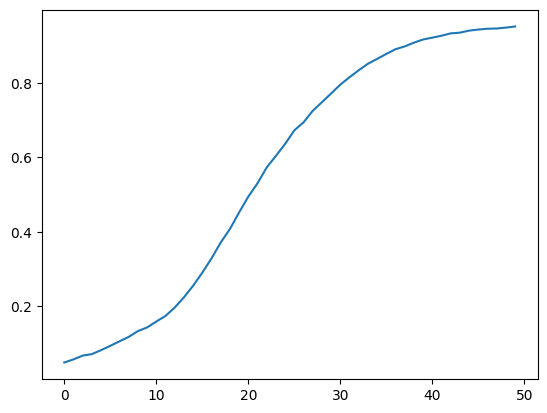

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

In [42]:
# Generate text using the trained model
def generate_text(text_input, next_words, model, max_sequence_length, tokenizer):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([text_input])[0]
        print(token_list)
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        text_input += " " + output_word
    return text_input

# Example of text generation
text_input = "There now is your insular"
generated_text = generate_text(text_input, next_words=20, model=model, max_sequence_length=max_sequence_len, tokenizer=tokenizer)
print(generated_text)



[28, 36, 20, 87, 1004]
1/1 [==============================] - 0s 370ms/step
[28, 36, 20, 87, 1004, 320]
1/1 [==============================] - 0s 19ms/step
[28, 36, 20, 87, 1004, 320, 4]
1/1 [==============================] - 0s 17ms/step
[28, 36, 20, 87, 1004, 320, 4, 1]
1/1 [==============================] - 0s 18ms/step
[28, 36, 20, 87, 1004, 320, 4, 1, 1005]
1/1 [==============================] - 0s 18ms/step
[28, 36, 20, 87, 1004, 320, 4, 1, 1005, 1006]
1/1 [==============================] - 0s 20ms/step
[28, 36, 20, 87, 1004, 320, 4, 1, 1005, 1006, 113]
1/1 [==============================] - 0s 18ms/step
[28, 36, 20, 87, 1004, 320, 4, 1, 1005, 1006, 113, 40]
1/1 [==============================] - 0s 17ms/step
[28, 36, 20, 87, 1004, 320, 4, 1, 1005, 1006, 113, 40, 1]
1/1 [==============================] - 0s 17ms/step
[28, 36, 20, 87, 1004, 320, 4, 1, 1005, 1006, 113, 40, 1, 208]
1/1 [==============================] - 0s 18ms/step
[28, 36, 20, 87, 1004, 320, 4, 1, 1005, 1006, 113,

In [43]:
generated_text

'There now is your insular city of the manhattoes belted round by the whale and your head civilized and the crossed sea it had a'

# **Seed Text:**
##*There now is your insular*

# **Generated Text- Keras + LSTM :**
##*There now is your insular city of the manhattoes belted round by the whale and your head civilized and the crossed sea it had a*

# **Problem 2: 3. Transfer Learning: Text generation model developed using word2vec word embeddings**

In [50]:
word2vec_model = api.load("word2vec-google-news-300")

# Load the data
#with open('/content/drive/MyDrive/DeepLearning/HW/HW4/mobydick_ch04.txt', 'r', encoding='utf-8') as file:
#    text = file.read()

# Tokenization and cleaning
tokenizer = Tokenizer()
tokenizer.fit_on_texts([tokens])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in tokens.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequence = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

X = input_sequence[:, :-1]
y = input_sequence[:,-1]

y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))

# Create an embedding matrix using Word2Vec embeddings
embedding_dim = 300
embedding_matrix = np.zeros((total_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]

# Build the model
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_sequence_len-1, trainable=False))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=50, verbose=2)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 16, 300)           818400    
                                                                 
 lstm_3 (LSTM)               (None, 150)               270600    
                                                                 
 dense_3 (Dense)             (None, 2728)              411928    
                                                                 
Total params: 1500928 (5.73 MB)
Trainable params: 682528 (2.60 MB)
Non-trainable params: 818400 (3.12 MB)
_________________________________________________________________
Epoch 1/50
322/322 - 3s - loss: 6.6641 - accuracy: 0.0514 - 3s/epoch - 10ms/step
Epoch 2/50
322/322 - 1s - loss: 6.1902 - accuracy: 0.0639 - 1s/epoch - 4ms/step
Epoch 3/50
322/322 - 1s - loss: 5.9905 - accuracy: 0.0852 - 1s/epoch - 4ms/step
Epoch 4/50
322/322 - 1s - loss: 5.730

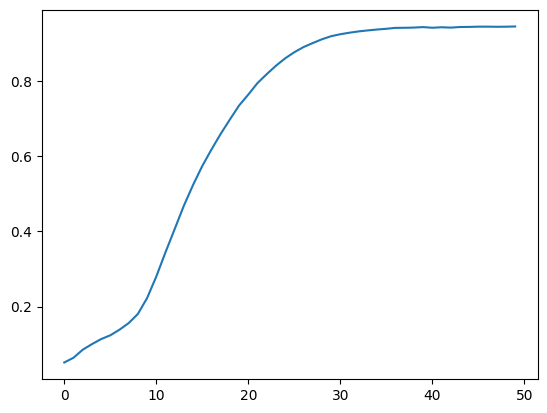

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

In [72]:
# Generate text using the trained model with temperature scaling
def generate_text(text_input, next_words, model, max_sequence_length, tokenizer, temperature=1.9):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([text_input])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
        predicted_probs = model.predict(token_list)[0]

        # Apply temperature scaling
        scaled_probs = predicted_probs**(1 / temperature)
        normalized_probs = scaled_probs / np.sum(scaled_probs)

        # Sample a word based on the scaled probabilities
        predicted_index = np.random.choice(len(normalized_probs), p=normalized_probs)

        output_word = tokenizer.index_word.get(predicted_index, "")
        text_input += " " + output_word

    return text_input

# Example of text generation
text_input = "There now is your insular"
generated_text = generate_text(text_input, next_words=20, model=model, max_sequence_length=max_sequence_len, tokenizer=tokenizer)
print(generated_text)

1/1 [==============================] - 0s 16ms/step
There now is your insular lives of something sort come in airth sort of a land probably sea was this most of guise whether so


In [73]:
print(generated_text)

There now is your insular lives of something sort come in airth sort of a land probably sea was this most of guise whether so


# **Seed Text:**
##*There now is your insular*

# **Generated Text- Word2Vec + LSTM :**
##*There now is your insular lives of something sort come in airth sort of a land probably sea was this most of guise whether so*